# Método Dinámico
---
### Regresión Lineal

18 de septiembre de 2016

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from random import random,randint,seed,sample
import matplotlib.pyplot as plt
import pandas as pda
import numpy as np
import scipy.stats
%matplotlib inline
from __future__ import division
seed(20160918)

In [8]:
# Extracción de datos
df1 = pda.DataFrame(pda.read_table("../datos_clase/regLin.csv", sep=",", header = 0))
x1 = df1[:][df1.columns[(0)]]
y1 = df1[:][df1.columns[1]]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.75)
x1_train = np.array(x1_train)
y1_train = np.array(y1_train)

In [9]:
# Datos centrados
x1_train_c = (x1_train - np.mean(x1_train))/np.var(x1_train)
y1_train_c = (y1_train - np.mean(y1_train))/np.var(y1_train)
x1_test_c = (x1_test - np.mean(x1_test))/np.var(x1_test)
y1_test_c = (y1_test - np.mean(y1_test))/np.var(y1_test)

In [10]:
# Función Regresión con algoritmo dinámico
def WsDimLin(xvec, yvec, nu):    
    ws0 = [1]
    ws1 = [1]
    mse = []
    errorlista = []
    for reng in range(len(xvec)):
        #reng = 0
        #print reng
        xobs = xvec[reng]
        yobs = yvec[reng]
        vx = ws0[reng] + ws1[reng]*xobs
        error = (yobs - vx)
        errorlista.append(error)
        mse.append( np.mean( (yobs - vx)**2 ) )
        ws1act = ws1[reng] + nu*error*xobs
        ws0act = ws0[reng] + nu*error*1
        ws1.append(ws1act)
        ws0.append(ws0act)
        if reng == (len(xvec)-1):
            vx = ws0[reng+1] + ws1[reng+1]*xobs
            mse.append( np.mean( (yobs - vx)**2 ) )
            errorlista.append( yobs - vx ) 
            
    ws0min = ws0[mse.index(np.min(mse))]
    ws1min = ws1[mse.index(np.min(mse))]
    fitmin = ws0min + ws1min*xvec
    residuales = yvec-fitmin
    
    plt.figure(1)
    plt.scatter(ws0, mse)
    plt.ylabel('ECM')
    plt.xlabel('Beta 0')  
    
    plt.figure(2)
    plt.scatter(ws1, mse)
    plt.ylabel('ECM')
    plt.xlabel('Beta 1') 
    
    plt.figure(3)
    plt.plot(errorlista)
    plt.ylabel('Error')
    plt.xlabel('Iteraciones') 
    
    plt.figure(4)
    plt.scatter(yvec, fitmin)
    plt.xlabel('observado')
    plt.ylabel('ajustado') 
    
    plt.figure(5)
    plt.scatter(xvec, yvec)
    plt.scatter(xvec, fitmin, color = 'green')
    plt.xlabel('x')
    plt.ylabel('y') 
    
    print "coeficientes", [ws0min, ws1min]
    print "ECM:", np.mean(residuales**2)
    return( [ws0, ws1, mse, ws0min, ws1min ] )

In [11]:
def FitTestDim(res, xv, yv):
    fitvec = res[3] + res[4]*xv
    residuales = yv-fitvec
    print "ECM:", np.mean(residuales**2)
    plt.scatter(xv, yv)
    plt.scatter(xv, fitvec, color = 'green')
    plt.xlabel('x')
    plt.ylabel('y') 

Ej 1. Regresión lineal con nu = .05 sin centrar

In [12]:
res1 = WsDimLin(xvec = x1_train, yvec = y1_train, nu = .05)
#FitTestDim(res1, yv = y1_train, xv = x1_train)
# 204894.038978

ValueError: nan is not in list

In [13]:
# Datos de prueba
FitTestDim(res1, yv = y1_test, xv = x1_test)
# 201402.265625

NameError: name 'res1' is not defined

 Ej 2. Regresión lineal con nu = 0.05 y datos centrados

coeficientes [0.0060737923872318158, 1.0143094273655298]
ECM: 0.00056010146143


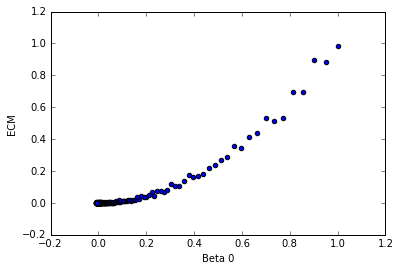

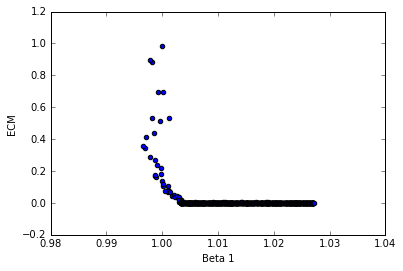

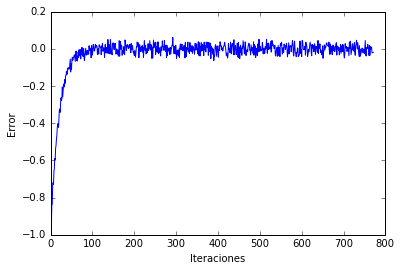

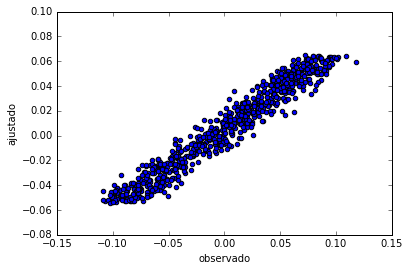

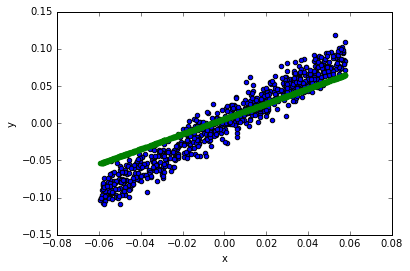

In [14]:
res2 = WsDimLin(xvec = x1_train_c, yvec = y1_train_c, nu = .05)
#FitTestDim(res2, xv = x1_train_c, yv = y1_train_c)
# 0.00304716020481

ECM: 0.000539772776916


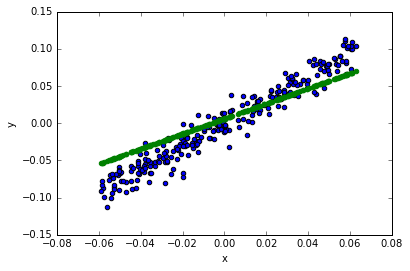

In [15]:
# Datos de prueba
FitTestDim(res= res2, xv = x1_test_c, yv = y1_test_c)
# 0.000594264751133

Ej 3. Regresión lineal con nu = 0.1 y datos centrados

coeficientes [-0.0083774132446425495, 1.0322029227496419]
ECM: 0.00057032427314


0.00304716020481

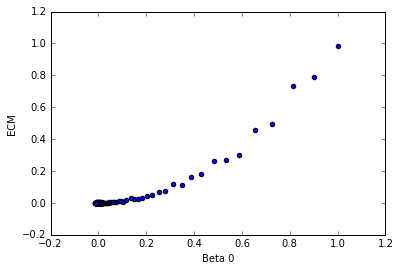

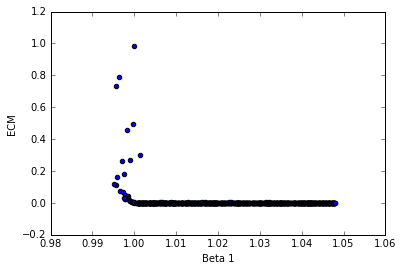

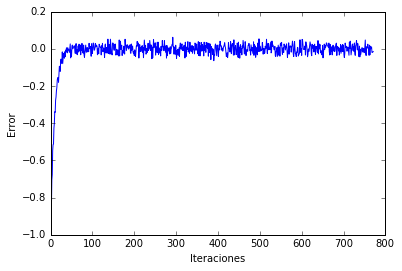

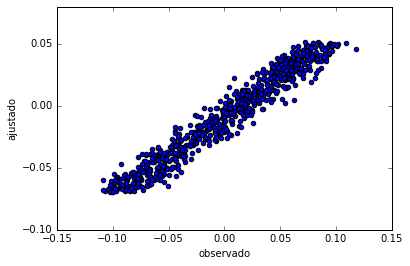

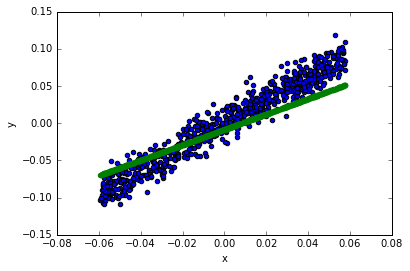

In [16]:
res3 = WsDimLin(xvec = x1_train_c, yvec = y1_train_c, nu = .1)
#FitTestDim(res= res3, xv = x1_train_c, yv = y1_train_c)
0.00304716020481

ECM: 0.000550338656769


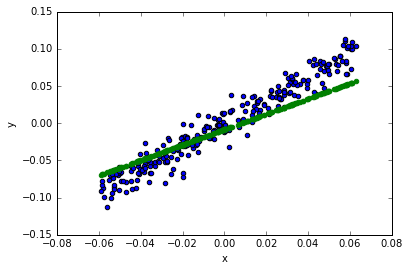

In [17]:
# Datos de prueba
FitTestDim(res= res3, xv = x1_test_c, yv = y1_test_c)
# 0.000540787883918

Ej 4. Regresión lineal con nu = 1 y datos centrados

coeficientes [-0.014538971312682371, 1.3115519098484931]
ECM: 0.000448941121674


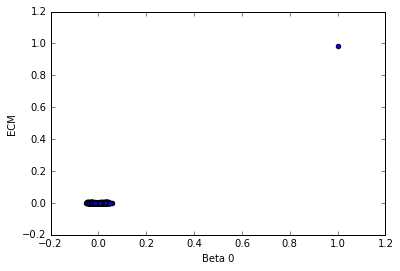

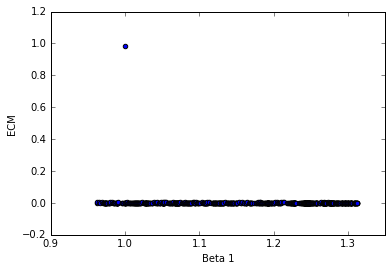

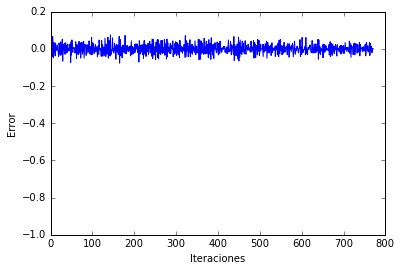

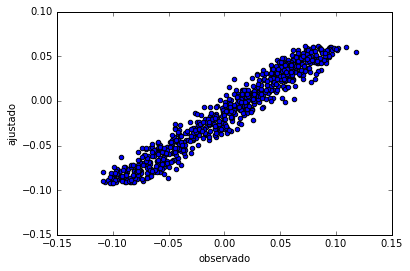

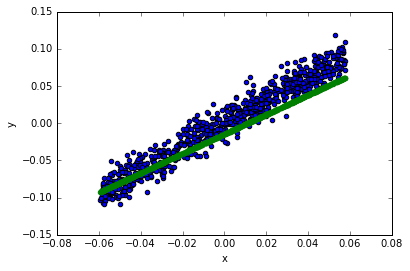

In [18]:
res4 = WsDimLin(xvec = x1_train_c, yvec = y1_train_c, nu = 1)
#FitTestDim(res4, xv=x1_train_c, yv=y1_train_c)
# 0.000459247820337

ECM: 0.000438350538898


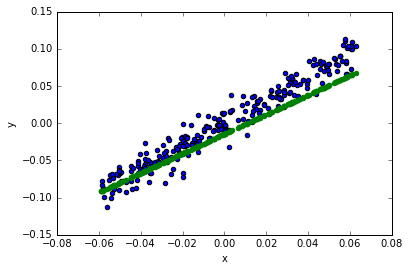

In [19]:
# Datos de prueba
FitTestDim(res4, xv=x1_test_c, yv=y1_test_c)
# 0.000520282695131

### Iteración con W's inicializadas

In [20]:
def WsDimLinU(xvec, yvec, nu, ws0init, ws1init):    
    ws0 = [ws0init]
    ws1 = [ws1init]
    errorlista = []
    for reng in range(len(xvec)):
        xobs = xvec[reng]
        yobs = yvec[reng]
        vx = ws0[reng] + ws1[reng]*xobs
        error = (yobs - vx)
        errorlista.append(error)
        ws1act = ws1[reng] + nu*error*xobs
        ws0act = ws0[reng] + nu*error*1
        ws1.append(ws1act)
        ws0.append(ws0act)
        if reng == (len(xvec)-1):
            vx = ws0[reng+1] + ws1[reng+1]*xobs
            errorlista.append( yobs - vx ) 
    
    ws0min = ws0[len(ws0)-1]
    ws1min = ws1[len(ws1)-1] 
    fitmin = ws0min + ws1min*xvec
    residuales = yvec-fitmin    
    mse = np.mean(residuales**2)
    return( [ws0min, ws1min, mse] )

In [21]:
mse = [0]
w0s = [1]
w1s = [1]
for i in range(200):
    resint = WsDimLinU(xvec = x1_train_c, 
                       yvec = y1_train_c, 
                       nu = .05, 
                       ws0init = w0s[i],
                       ws1init = w1s[i]
                      )
    mse.append(resint[2])
    w0s.append(resint[0])
    w1s.append(resint[1])

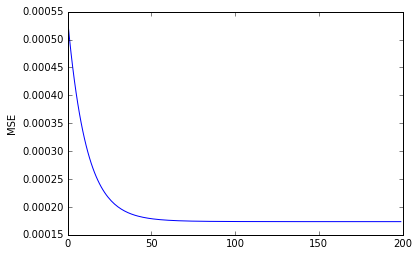

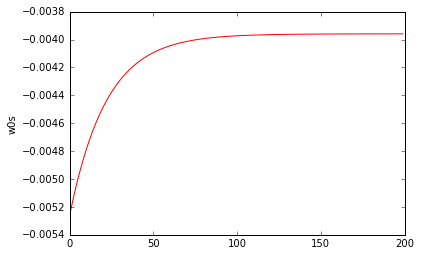

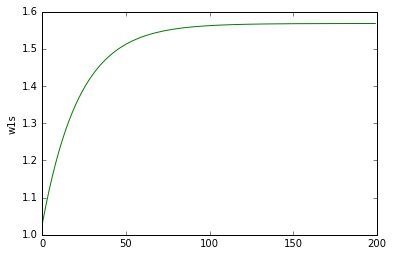

In [22]:
plt.figure(1)
plt.plot(mse[1:])
plt.ylabel("MSE")

plt.figure(2)
plt.plot(w0s[1:], color = "red")
plt.ylabel("w0s")

plt.figure(3)
plt.plot(w1s[1:], color = "green")
plt.ylabel("w1s")